*   Nama : **Virgiawan Teguh Kusuma**
*   Email : **181240000833@unisnu.ac.id**
*   Domisili : **Kabupaten Jepara, Jawa Tengah**

In [85]:
# import library 
import zipfile, os
from google.colab import drive
import tensorflow as tf
from tensorflow import keras

!pip install split-folders
import splitfolders
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from google.colab import files
import matplotlib.image as mpimg

In [86]:
# load google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# extract file masker.zip
maskerZip = '/content/drive/MyDrive/masker2.zip'
maskerZipRef = zipfile.ZipFile(maskerZip, 'r')
maskerZipRef.extractall('/content')
maskerZipRef.close()

In [4]:
# list directory
os.listdir('/content/Dataset')

['mask_weared_incorrect', 'with_mask', 'without_mask', 'result']

In [5]:
# inisialisasi path test, train, validation dll
basePath = '/content/Dataset'
result = '/content/Dataset/result'
testPath = '/content/Dataset/result/test'
trainPath = '/content/Dataset/result/train'
valPath = '/content/Dataset/result/val'

In [6]:
splitfolders.ratio(basePath, 
                   output=result, 
                   seed=1337, 
                   ratio=(.6, .4), 
                   group_prefix=None)

trainWithMaskPath = os.path.join(trainPath, 'with_mask')
trainWithMaskPath = os.path.join(trainPath, 'mask_weared_incorect')
trainWithoutMaskPath = os.path.join(trainPath, 'without_mask')

valWithMaskPath = os.path.join(valPath, 'with_mask')
valWithMaskPath = os.path.join(valPath, 'mask_weared_incorect')
valWithoutMaskPath = os.path.join(valPath, 'without_mask')

Copying files: 8982 files [00:02, 3355.55 files/s]


In [7]:
# augmentasi gambar dengan ImageDataGenerator
trainDataGenerator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode= 'nearest'
    )

testDataGenerator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode= 'nearest'
    )

In [89]:
trainGenerator = trainDataGenerator.flow_from_directory(
    directory=trainPath,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
    )

valGenerator = testDataGenerator.flow_from_directory(
    directory=valPath,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
    )

Found 5388 images belonging to 4 classes.
Found 3594 images belonging to 4 classes.


In [9]:
print(trainGenerator.class_indices)

{'mask_weared_incorrect': 0, 'result': 1, 'with_mask': 2, 'without_mask': 3}


In [10]:
# model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [11]:
# menggunakan callback agar pengujian berhenti jika mae mencapai target
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [12]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy']
              )

In [13]:
# train model dengan fit
history = model.fit(trainGenerator,
                    steps_per_epoch=25,
                    epochs=20, 
                    validation_data=valGenerator,
                    verbose=2,
                    callbacks=[callback]
                    )

Epoch 1/20
25/25 - 10s - loss: 0.9413 - accuracy: 0.5125 - val_loss: 0.5552 - val_accuracy: 0.7908
Epoch 2/20
25/25 - 9s - loss: 0.5575 - accuracy: 0.7775 - val_loss: 0.6007 - val_accuracy: 0.7127
Epoch 3/20
25/25 - 9s - loss: 0.4243 - accuracy: 0.8475 - val_loss: 0.3348 - val_accuracy: 0.8773
Epoch 4/20
25/25 - 9s - loss: 0.4087 - accuracy: 0.8575 - val_loss: 0.3215 - val_accuracy: 0.8675
Epoch 5/20
25/25 - 9s - loss: 0.3288 - accuracy: 0.8775 - val_loss: 0.2183 - val_accuracy: 0.9219
Epoch 6/20
25/25 - 9s - loss: 0.2963 - accuracy: 0.8750 - val_loss: 0.2520 - val_accuracy: 0.9135
Epoch 7/20
25/25 - 9s - loss: 0.2443 - accuracy: 0.9150 - val_loss: 0.1966 - val_accuracy: 0.9317
Epoch 8/20
25/25 - 9s - loss: 0.2359 - accuracy: 0.9062 - val_loss: 0.1783 - val_accuracy: 0.9400
Epoch 9/20
25/25 - 9s - loss: 0.2180 - accuracy: 0.9212 - val_loss: 0.1974 - val_accuracy: 0.9247
Epoch 10/20
25/25 - 9s - loss: 0.1888 - accuracy: 0.9400 - val_loss: 0.2251 - val_accuracy: 0.9219
Epoch 11/20
25/25 

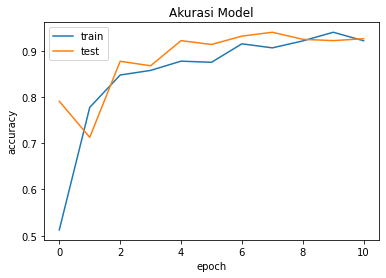

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

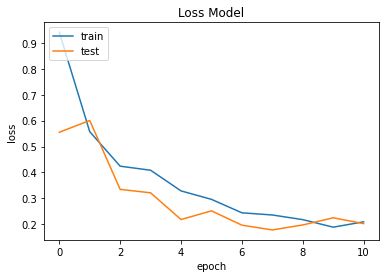

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

Saving b51f0b40-8442-11ea-bff5-fbedb30a8e06.png to b51f0b40-8442-11ea-bff5-fbedb30a8e06.png
b51f0b40-8442-11ea-bff5-fbedb30a8e06.png
[3]
Tidak Pakai Masker


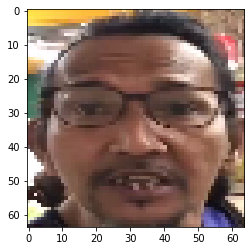

In [82]:
# memprediksi gambar
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(64, 64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  predIdxs = np.argmax(classes, axis=1)
  
  print(fn)
  print(predIdxs)
  # print(classes)
  if classes[0][2]>0:
    print('Pakai Masker')
  elif classes[0][3]>0:
    print('Tidak Pakai Masker')
  else:
    print('Tidak Pakai Masker dengan Benar')


In [83]:
# konversi model TFLiteConverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmps331ze0r/assets


INFO:tensorflow:Assets written to: /tmp/tmps331ze0r/assets


In [84]:
# simpan model dengan format .tflite
with tf.io.gfile.GFile('masker.tflite', 'wb') as f:
  f.write(tflite_model)